# Exploratory Data Analysis and Statistical Testing on Weekly Data

In [12]:
# Data Analysis Libraries
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis Libraries
from statsmodels.tsa.stattools import adfuller
from scipy.stats import jarque_bera

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(
    action="ignore",
    module= "scipy",    
    message="^internal gelsd"
)
warnings.filterwarnings(
    action="ignore",
    module= "numpy",    
    message="^internal gelsd"
)

In [2]:
df = pd.read_csv('weekly10.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3161 entries, 0 to 3160
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     3161 non-null   object 
 1   WGS10YR  3161 non-null   float64
dtypes: float64(1), object(1)
memory usage: 74.1+ KB


In [5]:
df.columns = ['ds', 'y']
list(df.columns.values)

['ds', 'y']

In [6]:
df.describe()

,y
count,3161.000
mean,5.922
std,2.992
min,0.550
25%,3.910
50%,5.730
75%,7.670
max,15.680


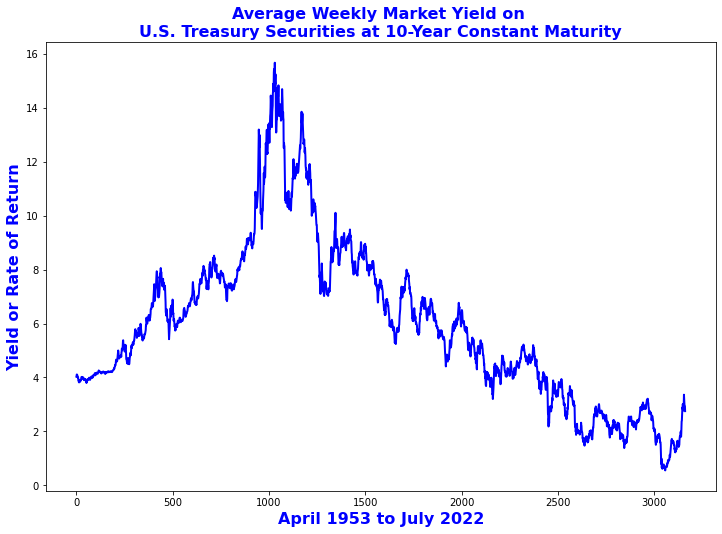

In [14]:
plt.plot(df['y'], linewidth=2, color='blue')
plt.rcParams["figure.figsize"] = (12,8.25)
plt.ylabel('Yield or Rate of Return', fontweight='bold', fontsize = 16, color='blue')
plt.xlabel('April 1953 to July 2022',fontweight='bold', fontsize = 16, color='blue')
plt.title('Average Weekly Market Yield on \nU.S. Treasury Securities at 10-Year Constant Maturity', fontweight='bold', fontsize = 16, color='blue')
plt.show()

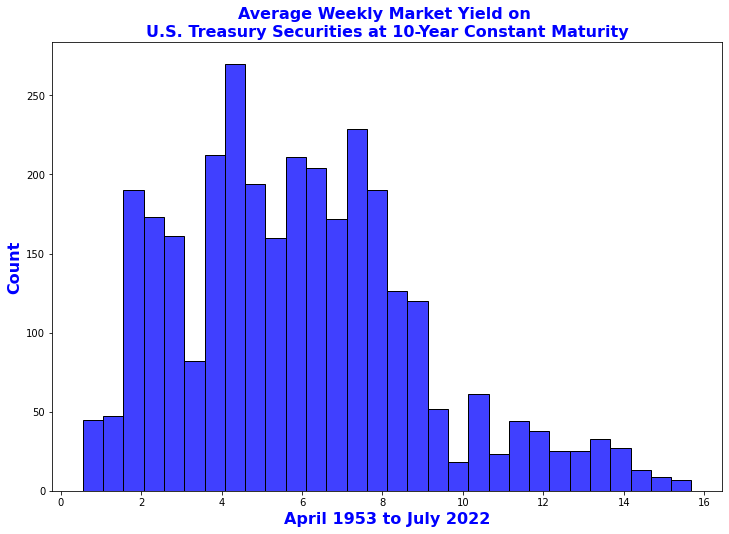

In [8]:
sns.histplot(df['y'], color = 'blue')
plt.rcParams["figure.figsize"] = (12,8.25)
plt.ylabel('Count', fontweight='bold', fontsize = 16, color='blue')
plt.xlabel('April 1953 to July 2022',fontweight='bold', fontsize = 16, color='blue')
plt.title('Average Weekly Market Yield on \nU.S. Treasury Securities at 10-Year Constant Maturity', fontweight='bold', fontsize = 16, color='blue')
plt.show()

## Statistical Testing

### Test run for Stationarity

#### Is the first two moments of the distribution stable?

In [9]:
# test run for stationarity
result = adfuller(df['y'])

# print the results
print ('ADF Statistic: %f' % result[0])
print ('p-value: %f' % result[1])
print ('Critical Values:')

for key, value in result[4].items():
  print('\t%s: %.3f' % (key,value))

ADF Statistic: -1.350507
p-value: 0.605761
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


#### No, the first two moments of distribution are not stable because we fail to reject the null hypothesis as the p - value is greater than 0.05.

#### However, the ADF Statistic is close to zero and the cascade of critical values show that the non - stationary is not very strong.

#### There is some stable stationary parts of the dataset, but less than the non - stationary parts.

### Test run for Normality

#### Is the dataset normally distributed, and if not, then how far is it from a normal distribution?

In [10]:
# normality test
stat, p = jarque_bera(df['y'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=232.685, p=0.000
Sample does not look Gaussian (reject H0)


In [11]:
df['y'].skew(), df['y'].kurt()

(0.6561673666843926, 0.2169109206431754)

#### In a similar fashion to stationarity, the dataset is non - normal, but the JB statistic is far from zero.

#### There is some level of normality in the dataset as both the third and fourth moments of distribution are near zero.

#### Overall, taking the two tests above shows regime switching in the dataset as past behavior may differ from future behavior.